In [5]:
import sys
sys.path.append('/home/david/fashionAI/rcnn/rcnn')

from pycocotools.coco import COCO
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
import skimage.io as io
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import json
from pathlib import Path

In [7]:
root_path = '/data/david/cocoapi'
# image_set = 'train2017'
image_set = 'val2017'
# image_set = 'test2017'
# json_instances_anno_file = Path(root_path, 'annotations', 'instances_%s.json'%image_set)
json_kp_anno_file = Path(root_path, 'annotations', 'person_keypoints_%s.json'%image_set)
# trainAnnFile = dataPath + '/annotations/instances_train2017.json'
# valAnnFile = rootPath + '/annotations/instances_val2017.json'
# json_file='./annotations/person_keypoints_val2017.json'  # Object Keypoint 类型的标注格式
# json_file='./annotations/captions_val2017.json' # Image Caption的标注格式

assert json_kp_anno_file.exists(), "anno file %s not exits" % json_kp_anno_file.as_posix()
coco=COCO(json_kp_anno_file.as_posix())

loading annotations into memory...
Done (t=0.36s)
creating index...
index created!


In [8]:
cats = coco.loadCats(coco.getCatIds())
cat_nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(cat_nms)))

COCO categories: 
person



In [23]:
imgIds = coco.getImgIds()
imgId=np.random.randint(0,len(imgIds))
imgId = 289059
img = coco.loadImgs(imgId)[0]
img_path = Path(root_path, 'images', image_set, img['file_name'])
# dir(img_path)
assert img_path.exists(), "image %s not exists" % img_path.as_posix()
I = io.imread(img_path)

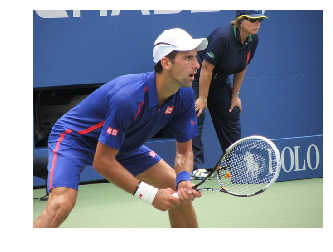

In [24]:
plt.axis('off')
plt.imshow(I)
plt.show()

[]
[428339, 473020]
[{'num_keypoints': 14, 'image_id': 289059, 'iscrowd': 0, 'bbox': [3.25, 38.74, 390.07, 435.57], 'id': 428339, 'segmentation': [[302.3, 43.07, 282.8, 51.74, 274.13, 73.41, 268.71, 99.41, 261.13, 116.75, 261.13, 127.58, 239.46, 137.34, 167.95, 152.51, 141.94, 173.09, 122.44, 189.35, 57.43, 235.94, 39.01, 273.86, 32.51, 347.54, 35.76, 414.72, 3.25, 467.81, 66.09, 466.73, 87.77, 433.14, 112.69, 343.21, 140.86, 341.04, 172.28, 382.21, 254.63, 427.72, 288.22, 440.72, 297.97, 451.56, 308.8, 471.06, 369.48, 474.31, 367.31, 468.89, 347.81, 428.8, 347.81, 427.72, 361.9, 413.63, 369.48, 402.8, 356.48, 373.54, 357.56, 265.19, 362.98, 213.18, 357.56, 195.85, 344.56, 168.76, 361.9, 157.92, 364.06, 136.25, 369.48, 109.16, 371.65, 100.5, 378.15, 92.91, 393.32, 82.08, 385.73, 65.82, 380.32, 61.49, 366.23, 60.41, 357.56, 56.07, 351.06, 54.99, 334.81, 45.24, 325.06, 38.74, 312.05, 38.74, 299.05, 39.82]], 'area': 91978.11345, 'keypoints': [359, 119, 2, 357, 103, 2, 341, 107, 2, 0, 0, 0

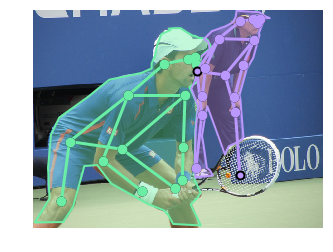

In [30]:
catIds=[]
for ann in coco.dataset['annotations']:
    if ann['image_id']==imgId:
        catIds.append(ann['category_id'])
print(catIds)
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco.getAnnIds(imgIds=img['id'], catIds=[], iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns)
plt.show()